# Prediksi Harga Bitcoin

In [117]:
#import library
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


# membaca file csv
file_path = 'btcusd_1-min_data.csv'
data = pd.read_csv(file_path)
data.head()
# Jika data tidak memiliki header di file
# tambahkan `header=None` saat membaca file


,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


In [118]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
scaler = MinMaxScaler(feature_range=(0, 1))

In [119]:
data.head()

,Timestamp,Open,High,Low,Close,Volume
0,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.0
1,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.0
2,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.0
3,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.0
4,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.0


In [120]:
missing_data = data[data.isnull().any(axis=1)]
print(missing_data)


        Timestamp     Open     High      Low    Close    Volume
6723280       NaT  57854.0  57864.0  57835.0  57835.0  1.353466


In [121]:
#menampilkan data dengan index 6723280
data.iloc[6723279:6723282]

,Timestamp,Open,High,Low,Close,Volume
6723279,2024-12-04,95926.0,96053.0,95926.0,96051.0,0.102888
6723280,NaT,57854.0,57864.0,57835.0,57835.0,1.353466


In [122]:
#drop index 6723280
data = data.drop(6723280)
data.head()

,Timestamp,Open,High,Low,Close,Volume
0,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.0
1,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.0
2,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.0
3,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.0
4,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.0


In [123]:
#memangkas data di bawah tahun 2018
data = data[data['Timestamp'] >= '2024-07-04']
data.head()

,Timestamp,Open,High,Low,Close,Volume
6576159,2024-07-04 00:00:00,59623.0,59694.0,59623.0,59669.0,0.901877
6576160,2024-07-04 00:01:00,59669.0,59669.0,59631.0,59664.0,0.219441
6576161,2024-07-04 00:02:00,59663.0,59703.0,59663.0,59703.0,0.216802
6576162,2024-07-04 00:03:00,59703.0,59703.0,59637.0,59637.0,0.087128
6576163,2024-07-04 00:04:00,59637.0,59643.0,59637.0,59638.0,0.184694


In [124]:
#perbaiki index
data = data.reset_index(drop=True)
data

,Timestamp,Open,High,Low,Close,Volume
0,2024-07-04 00:00:00,59623.0,59694.0,59623.0,59669.0,0.901877
1,2024-07-04 00:01:00,59669.0,59669.0,59631.0,59664.0,0.219441
2,2024-07-04 00:02:00,59663.0,59703.0,59663.0,59703.0,0.216802
3,2024-07-04 00:03:00,59703.0,59703.0,59637.0,59637.0,0.087128
4,2024-07-04 00:04:00,59637.0,59643.0,59637.0,59638.0,0.184694
...,...,...,...,...,...,...
147116,2024-12-03 23:56:00,95993.0,96001.0,95971.0,96001.0,0.185733
147117,2024-12-03 23:57:00,95991.0,96015.0,95970.0,95986.0,0.017923
147118,2024-12-03 23:58:00,95984.0,95984.0,95979.0,95983.0,0.048467
147119,2024-12-03 23:59:00,95966.0,95968.0,95926.0,95926.0,0.023079


In [125]:
print(data.describe())

                           Timestamp           Open           High  \
count                         147121  147121.000000  147121.000000   
mean   2024-08-30 23:35:29.716355840   64257.121308   64276.776001   
min              2024-07-04 00:00:00   49630.000000   49797.000000   
25%              2024-07-29 13:00:00   58428.000000   58444.000000   
50%              2024-08-24 02:00:00   61030.000000   61049.000000   
75%              2024-09-22 11:00:00   66536.000000   66549.000000   
max              2024-12-04 00:00:00   98996.000000   99121.000000   
std                              NaN    9842.689406    9845.836359   

                 Low          Close         Volume  
count  147121.000000  147121.000000  147121.000000  
mean    64237.767001   64257.379660       1.635940  
min     49577.000000   49587.000000       0.000000  
25%     58412.000000   58428.000000       0.038829  
50%     61015.000000   61031.000000       0.262951  
75%     66520.000000   66535.000000       0.977378 

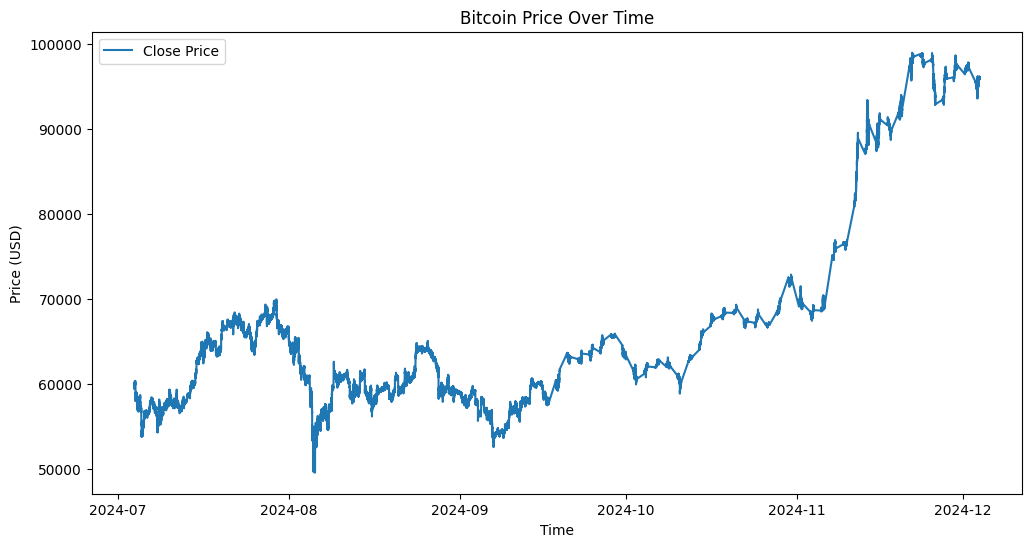

In [126]:
plt.figure(figsize=(12, 6))
# plt.plot(data['Timestamp'], data['Open'], label='Open Price')
plt.plot(data['Timestamp'], data['Close'], label='Close Price')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


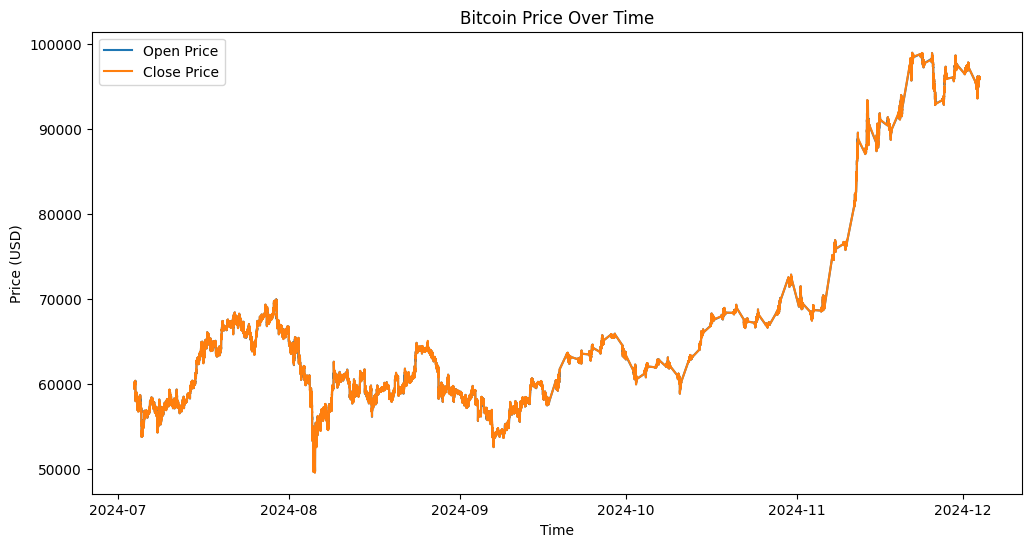

In [127]:
plt.figure(figsize=(12, 6))
plt.plot(data['Timestamp'], data['Open'], label='Open Price')
plt.plot(data['Timestamp'], data['Close'], label='Close Price')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [128]:
data_scaled = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Volume']])
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step, 3])  # Harga Close sebagai target
    return np.array(X), np.array(y)

X, y = create_dataset(data_scaled)

# Tentukan proporsi untuk training, validation, dan testing
train_size = int(len(X) * 0.8)  # 80% untuk training
val_size = int(len(X) * 0.1)  # 10% untuk validation
test_size = len(X) - train_size - val_size  # 10% untuk testing

# Membagi data menjadi train, validation, dan test
X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]

print(f"Training Data: {X_train.shape}")
print(f"Validation Data: {X_val.shape}")
print(f"Testing Data: {X_test.shape}")


Training Data: (117648, 60, 5)
Validation Data: (14706, 60, 5)
Testing Data: (14707, 60, 5)


In [129]:
# Bangun model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))  # Output layer untuk harga
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Latih model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3677/3677 ━━━━━━━━━━━━━━━━━━━━ 127s 34ms/step - loss: 4.9328e-04 - val_loss: 5.9517e-06
Epoch 2/10
3677/3677 ━━━━━━━━━━━━━━━━━━━━ 132s 36ms/step - loss: 5.3316e-06 - val_loss: 8.8370e-06
Epoch 3/10
3677/3677 ━━━━━━━━━━━━━━━━━━━━ 154s 39ms/step - loss: 3.7610e-06 - val_loss: 2.3471e-06
Epoch 4/10
3677/3677 ━━━━━━━━━━━━━━━━━━━━ 130s 35ms/step - loss: 2.6407e-06 - val_loss: 1.8509e-06
Epoch 5/10
3677/3677 ━━━━━━━━━━━━━━━━━━━━ 130s 35ms/step - loss: 1.9164e-06 - val_loss: 1.6568e-06
Epoch 6/10
3677/3677 ━━━━━━━━━━━━━━━━━━━━ 129s 35ms/step - loss: 1.7345e-06 - val_loss: 1.9259e-06
Epoch 7/10
3677/3677 ━━━━━━━━━━━━━━━━━━━━ 128s 35ms/step - loss: 1.7889e-06 - val_loss: 1.7002e-06
Epoch 8/10
3677/3677 ━━━━━━━━━━━━━━━━━━━━ 130s 35ms/step - loss: 1.5544e-06 - val_loss: 1.9858e-06
Epoch 9/10
3677/3677 ━━━━━━━━━━━━━━━━━━━━ 141s 35ms/step - loss: 1.6064e-06 - val_loss: 4.7153e-06
Epoch 10/10
3677/3677 ━━━━━━━━━━━━━━━━━━━━ 131s 36ms/step - loss: 1.5774e-06 - val_loss: 2.0286e-06


In [130]:
# Prediksi dengan data testing
y_pred = model.predict(X_test)

# Evaluasi model (menggunakan RMSE)
from sklearn.metrics import mean_squared_error
y_pred_rescaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 4)), y_pred), axis=1))[:, -1]
y_test_rescaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 4)), y_test.reshape(-1, 1)), axis=1))[:, -1]
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
print(f'RMSE: {rmse}')


460/460 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step
RMSE: 7.580362689230059


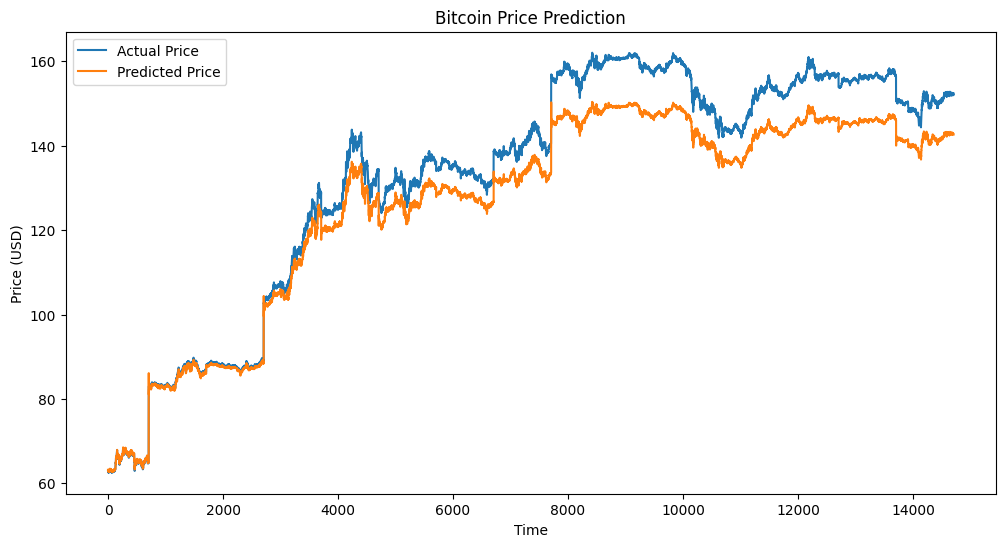

In [131]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual Price')
plt.plot(y_pred_rescaled, label='Predicted Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [132]:
# Menyimpan model ke file .h5 (format HDF5)
model.save('bitcoin_price_prediction_model2.h5')


In [133]:
from tensorflow.keras.models import load_model

# Memuat model yang sudah disimpan
loaded_model = load_model('bitcoin_price_prediction_model2.h5')

# Prediksi menggunakan model yang dimuat
y_pred_loaded_model = loaded_model.predict(X_test)

# Jika perlu, lakukan inverse scaling pada hasil prediksi
y_pred_rescaled_loaded_model = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred_loaded_model), 4)), y_pred_loaded_model), axis=1))[:, -1]


460/460 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step


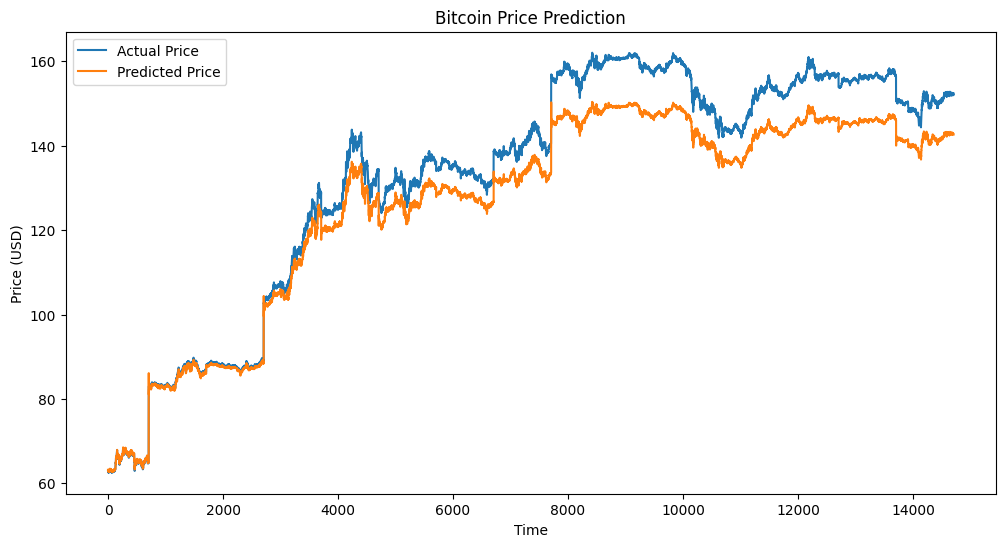

In [134]:
#visualisasi
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual Price')
plt.plot(y_pred_rescaled_loaded_model, label='Predicted Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()